### Generative Art: A sandpile model
###### by Hamed Shah-Hosseini
Code at: https://github.com/ostad-ai/generative-art

In [1]:
from matplotlib import pyplot as plt
from pycolors import css_colors
import numpy as np
from numba import njit

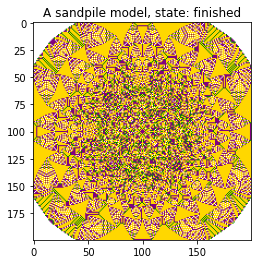

In [2]:
WIDTH,HEIGHT,THRESHOLD=200,200,3
image=np.zeros((HEIGHT,WIDTH,3),dtype='int')
sand_pile=np.zeros((HEIGHT,WIDTH),dtype='int64')
center=int(HEIGHT/2),int(WIDTH/2)
sand_pile[center]=100000
iter=100000
def update_image():
    index=np.where(sand_pile==0)
    image[index]=css_colors['white']
    index=np.where(sand_pile==1)
    image[index]=css_colors['green']
    index=np.where(sand_pile==2)
    image[index]=css_colors['purple']
    index=np.where(sand_pile>=THRESHOLD)
    image[index]=css_colors['gold']
@njit
def topple(sand_pile,iter):
    new_pile=np.zeros_like(sand_pile)
    for i in range(iter):
        new_pile.fill(0)
        for row in range(HEIGHT):
            for col in range(WIDTH):
                if sand_pile[row,col]<=THRESHOLD:
                    new_pile[row,col]=sand_pile[row,col]
        for row in range(HEIGHT):
            for col in range(WIDTH):
                if sand_pile[row,col]>THRESHOLD:
                    sand_pile[row,col]-=4
                    new_pile[row,col]+=sand_pile[row,col]
                    if col-1>=0:
                        new_pile[row,col-1]+=1
                    if row-1>=0:
                        new_pile[row-1,col]+=1
                    if col+1<WIDTH:
                        new_pile[row,col+1]+=1
                    if row+1<HEIGHT:
                        new_pile[row+1,col]+=1
        sand_pile=new_pile.copy()
    return new_pile
sand_pile=topple(sand_pile,iter)
update_image()
plt.imshow(image)
if len(np.where(sand_pile>THRESHOLD)[0])==0:
    finished='finished'
else:
    finished='not finished'
plt.title(f'A sandpile model, state: {finished}')
plt.show()